# Lab | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.
## Instructions
    1) Import the necessary libraries.
    2) Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
    3) First look at its main features (head, shape, info).
    4) Rename the columns so they follow the PE8 (snake case).
    5) Change effective to date column to datetime format.
    6) Check NaN values per column.
    7) Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
    8) For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
    9) Get categorical features.
    10) What should we do with the customer_id column?

## Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## First look at its main features (head, shape, info).

In [3]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

## Rename the columns so they follow the PE8 (snake case).


In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ","_")
customer_df.rename(columns = {"employmentstatus" : "employment_status"}, inplace = True)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Change effective to date column to datetime format.

In [5]:
customer_df['effective_to_date'] =  pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## Check NaN values per column.

In [6]:
nans = customer_df[customer_df.isna().any(axis=1)]
display(nans.head())
print('----------------------------------')
display(customer_df.isna().any(axis=1))
print('----------------------------------')
nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
display(nulls.sort_values(by='Percentage Null Values', ascending = False))

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


----------------------------------


0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

----------------------------------


,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


## Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [7]:
numcols = customer_df.select_dtypes(np.number)
numcols_list = list(numcols.columns)
discrete_cols = []
continuous_cols = []
for col in numcols_list:
    item_counts = customer_df[col].value_counts()
    print(col, ' : ', len(item_counts))
    if len(item_counts) > 100:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)
discrete_cols.append('effective_to_date')
print(discrete_cols)
print(continuous_cols)

customer_lifetime_value  :  8041
income  :  5694
monthly_premium_auto  :  202
months_since_last_claim  :  36
months_since_policy_inception  :  100
number_of_open_complaints  :  6
number_of_policies  :  9
total_claim_amount  :  5106
['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'effective_to_date']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


In [8]:
continuous = customer_df[continuous_cols]
display(continuous.head())
discrete = customer_df[discrete_cols]
display(discrete.head())
categorical = customer_df.select_dtypes(np.object)
display(categorical.head())

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,32,5,0,1,2011-02-24
1,13,42,0,8,2011-01-31
2,18,38,0,2,2011-02-19
3,18,65,0,7,2011-01-20
4,12,44,0,1,2011-02-03


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## For the categorical data, check if there is some kind of text in a variable so we would need to clean it.  Hint: Use the same method you used in step 7.  Depending on the implementation, decide what to do with the variables you get.

In [9]:
catcols_list = list(categorical.columns)
for col in catcols_list:
    item_counts = categorical[col].value_counts()
    print(col, ' : ', len(item_counts))
    if col != 'customer':
        print(item_counts)
        print()

customer  :  9134
state  :  5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response  :  2
No     7826
Yes    1308
Name: response, dtype: int64

coverage  :  3
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education  :  5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employment_status  :  5
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

gender  :  2
F    4658
M    4476
Name: gender, dtype: int64

location_code  :  3
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status  :  3
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type  :  3
Personal Auto     6788
Co

## What should we do with the customer_id column?

##### We won't use client_id in the model, but we want to keep the relation of rows to rhe exact client, so we will turn client_id into the index.

In [10]:
categorical = categorical.set_index(categorical['customer'])
categorical = categorical.drop(['customer'], axis=1)
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------

# Lab | Cleaning categorical data
#### For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

### Instructions
    Import the necessary libraries if you are starting a new notebook.
    Load the continuous and discrete variables into continuous_df and discrete_df variables.
    Plot a correlation matrix, what can you see?
    Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
    What can you see in the plots?
    Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
    Have you found outliers? If you have, what should we do with them?
    Check nan values per column.

### Load the continuous and discrete variables into continuous_df and discrete_df variables

In [11]:
continuous_df = continuous
discrete_df = discrete

### Plot a correlation matrix, what can you see?

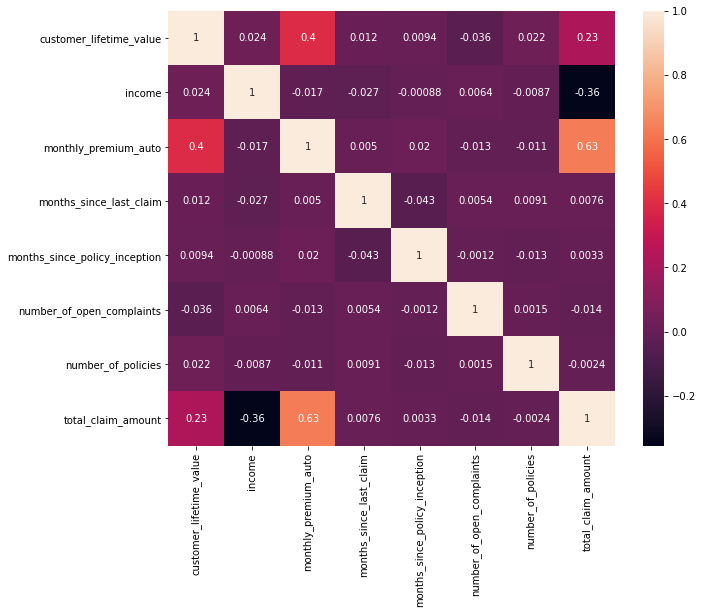

In [12]:
corr_matrix = numcols.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

From the correlation matrix we can spot the relatively high correlation between `total_claim_amount` and `monthly_premium_auto`.               
Maybe we could drop the `monthly_premium_auto` column?

### Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

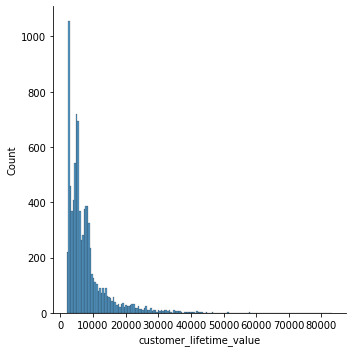

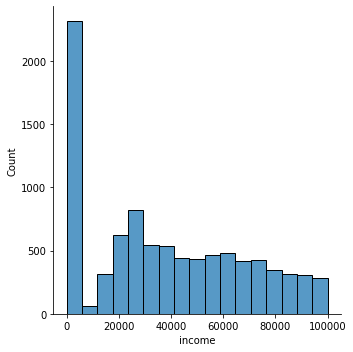

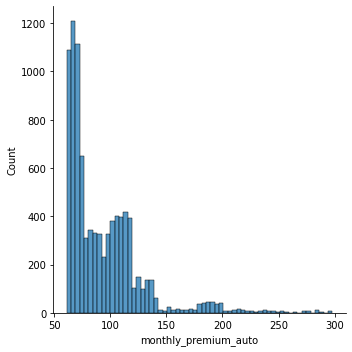

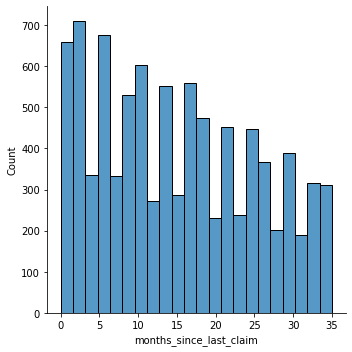

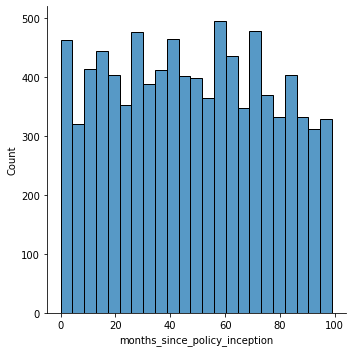

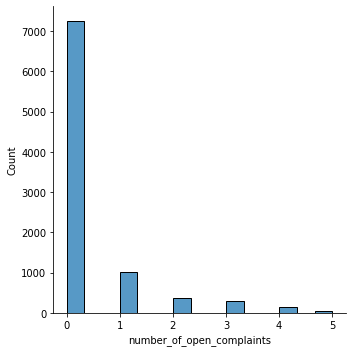

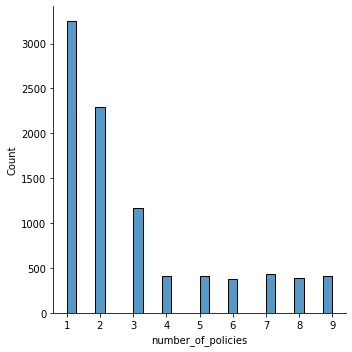

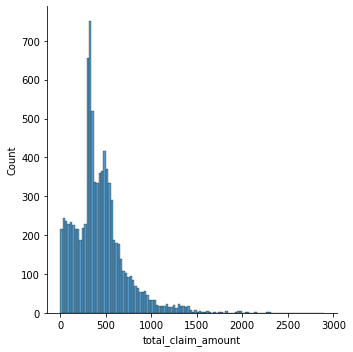

In [13]:
def num_plotter(df):
    numcolumns = df.select_dtypes(np.number)
    numcolumns_list = list(numcolumns.columns)
    for col in numcolumns_list:
        sns.displot(numcols, x = col)
        plt.show()

num_plotter(customer_df)

### Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

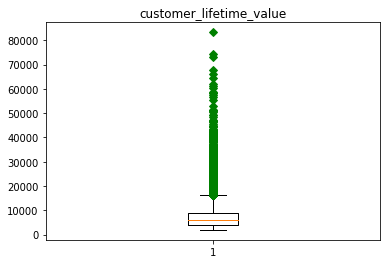

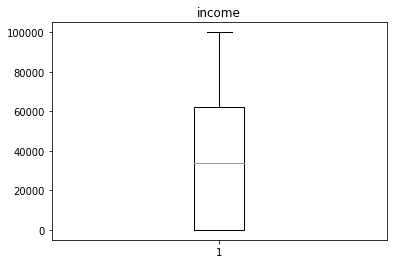

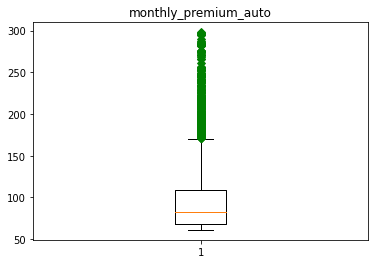

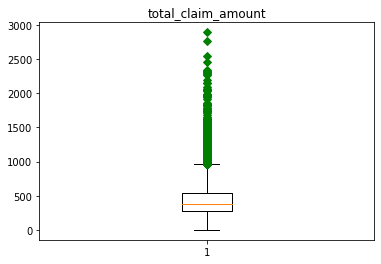

In [15]:
def get_boxplot(df):
    df_cols_list = list(df.columns)
    for col in df_cols_list:
        fig1, ax1 = plt.subplots()
        ax1.set_title(col)
        ax1.boxplot(df[col], 0, 'gD')
        plt.show()

get_boxplot(continuous_df)

In [16]:
def outliers(x):
    iqr = np.percentile(continuous_df[x],75) - np.percentile(continuous_df[x],25)
    upper_limit = np.percentile(continuous_df[x],75) + 1.5*iqr
    lower_limit = np.percentile(continuous_df[x],25) - 1.5*iqr
    print("The upper wisker is at: %4.2f" % upper_limit)
    print("The lower wisker is at: %4.2f" % lower_limit)
    outliers_upper = continuous_df[continuous_df[x] > upper_limit].index.tolist()
    outliers_lower = continuous_df[lower_limit > continuous_df[x]].index.tolist()
    print("The number of points outside the upper wisker is: ",len(outliers_upper))
    print("The number of points outside the lower wisker is: ",len(outliers_lower))
    
list_continuous = list(continuous_df.columns)
for i in list_continuous:
    print("Column: ", i)
    outliers(i)
    print(
    )

Column:  customer_lifetime_value
The upper wisker is at: 16414.04
The lower wisker is at: -3457.62
The number of points outside the upper wisker is:  817
The number of points outside the lower wisker is:  0

Column:  income
The upper wisker is at: 155800.00
The lower wisker is at: -93480.00
The number of points outside the upper wisker is:  0
The number of points outside the lower wisker is:  0

Column:  monthly_premium_auto
The upper wisker is at: 170.50
The lower wisker is at: 6.50
The number of points outside the upper wisker is:  430
The number of points outside the lower wisker is:  0

Column:  total_claim_amount
The upper wisker is at: 960.40
The lower wisker is at: -140.63
The number of points outside the upper wisker is:  453
The number of points outside the lower wisker is:  0



### Have you found outliers? If you have, what should we do with them?

Yes, there are plenty of outliers, but my guess is that those values are not really outliers, but just a sign of a very non-normal distribution of values in the columns. Therefore, the bet thing to do is just to perform data transformations(most preferably `box-cox`) in order to make the distribution closer to normal, because if we deal with outliers in other way, it will affect the data, because the amount of "outliers" is big.

# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------

# Lab | Feature extraction
### For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions
    Open the categoricals variable we created before.
`categoricals = data.select_dtypes(np.object)
categoricals.head()`

    Plot all the categorical variables with the proper plot. What can you see?
    There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    Plot time variable. Can you extract something from it?

### 1) Open the categoricals variable we created before.

In [17]:
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2) Plot all the categorical variables with the proper plot. What can you see?

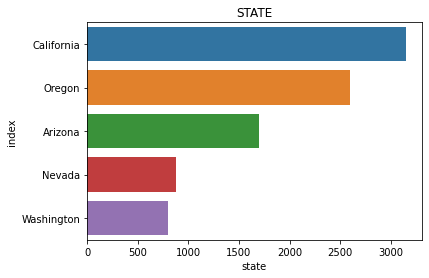

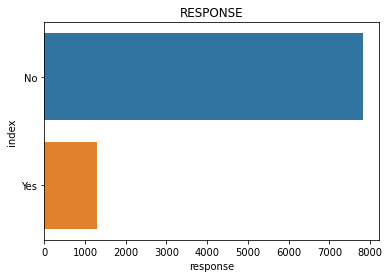

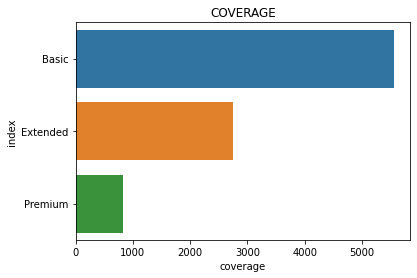

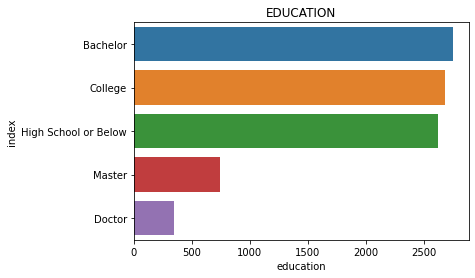

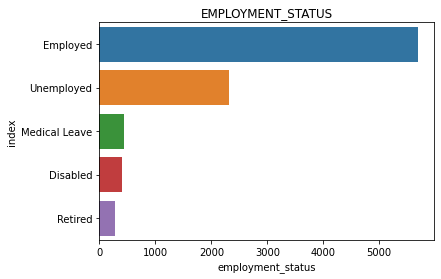

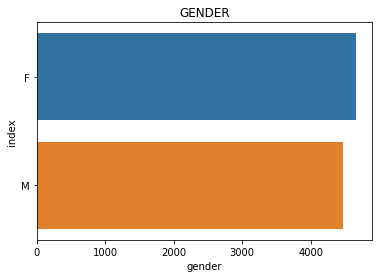

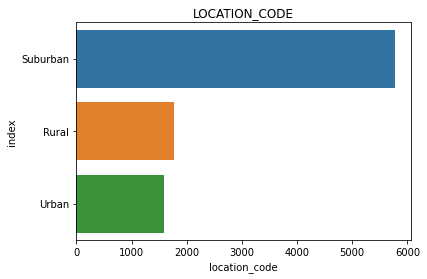

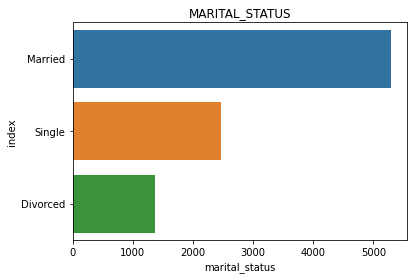

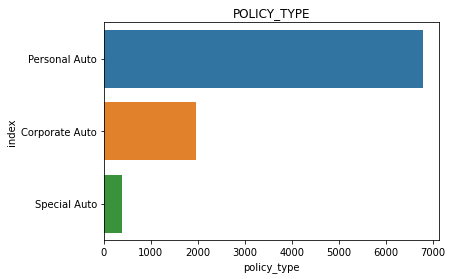

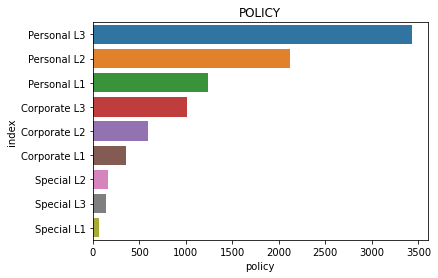

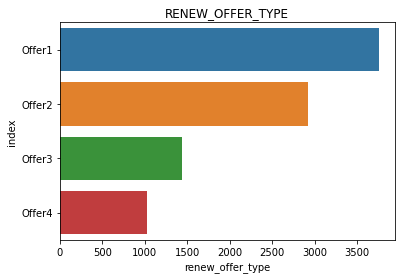

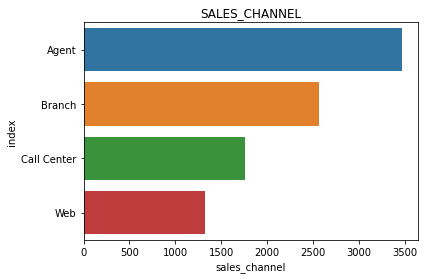

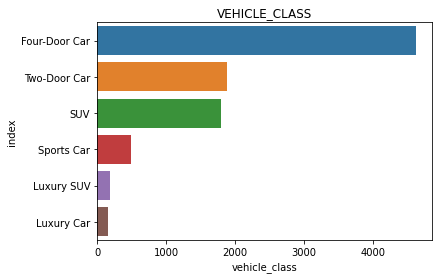

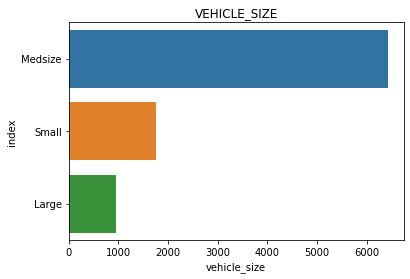

<Figure size 432x288 with 0 Axes>

In [18]:
def cat_plotter(df):
    cols_cat = list(df.select_dtypes(include=['object']).columns)
    for col in cols_cat:
        my_data = df[col].value_counts().reset_index()
        ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
        plt.figure()
    
cat_plotter(categorical)

#### After plotting the categoricals, I can see, that there are a lot of columns, where one feature is way biider, than any other features, for example 
`coverage`,`employment_status`,`location_code`,`marital_status`, `vehicle_class`,`vehicle_size`.

### 3) There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [23]:
list_cat = list(categorical.columns)
for col in list_cat:
    display(categorical[col].value_counts())
    print()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

### 4) Plot time variable. Can you extract something from it?

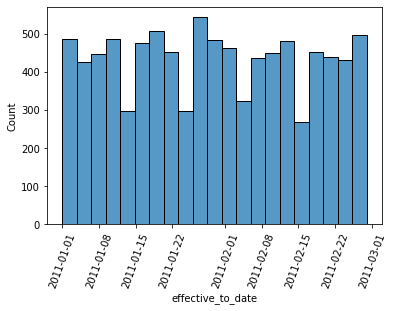

In [24]:
chart = sns.histplot(discrete_df['effective_to_date'])
plt.xticks(rotation=70)
plt.show()

I guess we cannot extract anything from this variable, because it is just showing to what date the incurance is valid for customer.